**HEART ATTACK ANALYSIS AND PREDICTION**

In [1]:
# IMPORTING THE LIBRARIES
import itertools
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

C:\Users\Meghna\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv(r"C:\Users\Meghna\Downloads\heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
y = df['output'].values
x = df.iloc[:,:-1].values

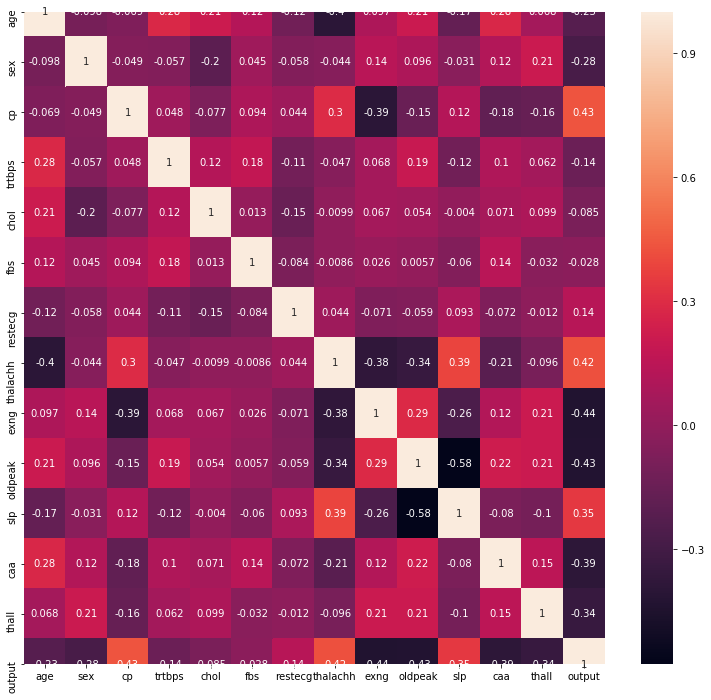

In [45]:
from matplotlib.pyplot import figure
figure(figsize= (13,12))
sns.heatmap(df.corr(),annot= True)
plt.show()

**KNN**

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

n=KNeighborsClassifier(n_neighbors=50).fit(x_train,y_train)
yhat=n.predict(x_test)
print("Train: ",accuracy_score(y_train,n.predict(x_train)))
print("Test: ",accuracy_score(y_test,yhat))

Train:  0.6735537190082644
Test:  0.6557377049180327


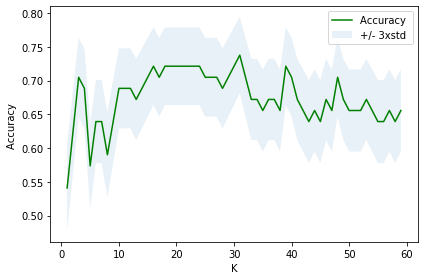

In [21]:
ks=60
m=np.zeros(ks-1)
std=np.zeros(ks-1)
for i in range(1,ks):
    n=KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
    yhat=n.predict(x_test)
    m[i-1]=accuracy_score(y_test,yhat)
    std[i-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
plt.plot(range(1,ks),m,'g')
plt.fill_between(range(1,ks),m-std,m+std,alpha=0.1)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('K')
plt.tight_layout()
plt.show()

In [15]:
print("Best accuracy at",m.max(),"k=",m.argmax()+1)

Best accuracy at 0.7377049180327869 k= 31


In [23]:
n1=KNeighborsClassifier(n_neighbors=31).fit(x_train,y_train)
yhat1=n1.predict(x_test)
print("Train:",accuracy_score(y_train,n1.predict(x_train)))
print("Test:",accuracy_score(y_test,yhat1))

Train: 0.6694214876033058
Test: 0.7377049180327869


In [25]:
from sklearn.metrics import f1_score
print('F1: ', f1_score(y_test, yhat1))

F1:  0.7777777777777778


**DECISION TREE**

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(criterion='entropy',max_depth=4).fit(x_train,y_train)
yhat2=dt.predict(x_test)
print("Train:",accuracy_score(y_train,dt.predict(x_train)))
print("Test:",accuracy_score(y_test,yhat2))

Train: 0.8677685950413223
Test: 0.8524590163934426


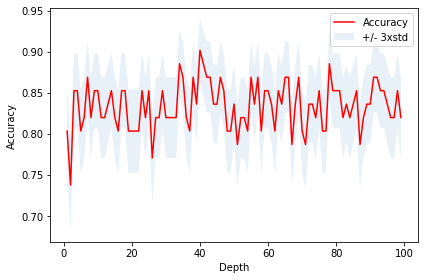

In [27]:
lvls=100
mean=np.zeros((lvls-1))
std=np.zeros((lvls-1))
for i in range(1,lvls):  
    t=DecisionTreeClassifier(criterion='entropy',max_depth=i).fit(x_train,y_train)
    yhat=t.predict(x_test)
    mean[i-1]=accuracy_score(y_test,yhat)
    std[i-1]=np.std(y_test==yhat)/np.sqrt(yhat.shape[0])
plt.plot(range(1,lvls),mean,'r')
plt.fill_between(range(1,lvls),mean-1*std,mean+1*std,alpha=0.1)
plt.legend(('Accuracy','+/- 3xstd'))
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [28]:
print("Best accuracy at",mean.max(),"Depth=",mean.argmax()+1)

Best accuracy at 0.9016393442622951 Depth= 40


In [31]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=40).fit(x_train,y_train)
yhat2=dt1.predict(x_test)
print("Train: ",accuracy_score(y_train,dt1.predict(x_train)))
print("Test: ",accuracy_score(y_test,yhat2))

Train:  1.0
Test:  0.8360655737704918


In [33]:
print('F1: ', f1_score(y_test, yhat2))

F1:  0.8611111111111112


**RANDOM FOREST**

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
RFclassifier= RandomForestClassifier(n_estimators=10)
RFclassifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
y_pred_RF = RFclassifier.predict(x_test)

In [43]:
print('ACCURACY:', accuracy_score(y_test, y_pred_RF))

ACCURACY: 0.7540983606557377


In [44]:
print('F1: ', f1_score(y_test, y_pred_RF))

F1:  0.7692307692307692
